In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import datetime, os, sys

In [10]:
df = pd.read_csv('aac_shelter_outcomes.csv',
    parse_dates=['date_of_birth','datetime','monthyear'])
df.head()


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [11]:
df.describe()

<ipython-input-11-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-11-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-11-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A718223,Dog,Domestic Shorthair Mix,Black/White,2014-05-05 00:00:00,2016-04-18 00:00:00,2016-04-18 00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784
first,NaN,NaN,NaN,NaN,NaN,1991-12-11 00:00:00,2013-10-01 09:31:00,2013-10-01 09:31:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-12-25 00:00:00,2018-02-01 18:44:00,2018-02-01 18:44:00,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78248 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   monthyear         78256 non-null  object        
 8   name              54370 non-null  object        
 9   outcome_subtype   35963 non-null  object        
 10  outcome_type      78244 non-null  object        
 11  sex_upon_outcome  78254 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 7.2+ MB


In [12]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [13]:
for c in df.columns:
    print(c)
    if len(df[c].unique()) <= 12:
        display(df[c].value_counts(dropna=False))
    elif isinstance(df[c].dtype,np.int64) or isinstance(df[c].dtype,np.float64):
        display(df[c].hist())
    else:
        print(len(df[c].unique()),'distinct values')

age_upon_outcome
47 distinct values
animal_id
70855 distinct values
animal_type


Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

breed
2128 distinct values
color
525 distinct values
date_of_birth
5869 distinct values
datetime
64361 distinct values
monthyear
64361 distinct values
name
14575 distinct values
outcome_subtype
20 distinct values
outcome_type


Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
NaN                   12
Name: outcome_type, dtype: int64

sex_upon_outcome


Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
NaN                  2
Name: sex_upon_outcome, dtype: int64

In [14]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [16]:
df.outcome_type.value_counts(dropna=False)

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
NaN                   12
Name: outcome_type, dtype: int64

<AxesSubplot:>

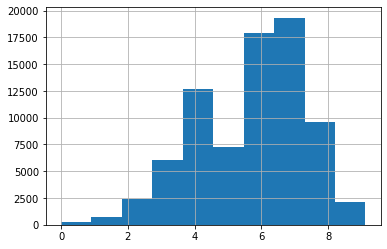

In [18]:
def process_age(x):
    if pd.isna(x):
        return np.nan
    n, s = x.split(" ")
    length_map = {
        'day':1,
        'week':7,
        'month':30,
        'year':365,
    }
    return int(n) * length_map[s.strip('s')]

df.age_upon_outcome.apply(process_age).apply(lambda x: np.log(1+x)).hist()

In [19]:
df[df.age_upon_outcome.apply(process_age) <= 0].age_upon_outcome.value_counts()

0 years    95
Name: age_upon_outcome, dtype: int64

In [23]:
df['sex'] = df.sex_upon_outcome.apply(lambda s: np.nan if pd.isna(s) else s.split(" ")[-1])
df['neuter_status'] = df.sex_upon_outcome.apply(lambda s: np.nan if pd.isna(s) else s.split(" ")[0])

In [24]:
px.bar(df.sex.fillna('No entry').value_counts(dropna=False))

In [25]:
def gen_pie_chart(inp_df,col):
    vc = inp_df[col].value_counts(dropna=False).reset_index()
    vc[[col,'count']] = vc[['index',col]]
    vc = vc.sort_values(by='count')
    return px.pie(vc,values='count',names=col)

In [26]:
gen_pie_chart(df,'sex')

In [27]:
gen_pie_chart(df,'outcome_type')

In [28]:
px.bar(df.outcome_type.fillna('No entry').value_counts(dropna=False))

In [31]:
df.groupby(['outcome_type','outcome_subtype'],dropna=False).count().animal_id

outcome_type     outcome_subtype    
Adoption         Barn                       1
                 Foster                  5558
                 Offsite                  367
                 NaN                    27186
Died             At Vet                    33
                 Enroute                   45
                 In Foster                164
                 In Kennel                335
                 In Surgery                16
                 NaN                       87
Disposal         NaN                      307
Euthanasia       Aggressive               506
                 At Vet                    26
                 Behavior                 142
                 Court/Investigation       18
                 Medical                  259
                 Rabies Risk             2417
                 Suffering               2514
                 Underage                  28
                 NaN                      170
Missing          In Foster                 

In [32]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'sex', 'neuter_status'],
      dtype='object')

In [34]:
df.animal_id.value_counts().value_counts()

1     64990
2      4771
3       812
4       184
5        62
6        24
7         6
8         3
11        2
10        1
Name: animal_id, dtype: int64

In [35]:
(df.animal_id.value_counts() >= 2).index

Index(['A718223', 'A706536', 'A721033', 'A716018', 'A694501', 'A616444',
       'A671704', 'A738324', 'A683108', 'A735601',
       ...
       'A742768', 'A736043', 'A669408', 'A669949', 'A733602', 'A741190',
       'A725590', 'A729391', 'A724909', 'A695934'],
      dtype='object', length=70855)

In [36]:
df[df.animal_id == 'A697910'].sort_values(by='datetime')[['age_upon_outcome','datetime','outcome_type','outcome_subtype','sex_upon_outcome']]


,age_upon_outcome,datetime,outcome_type,outcome_subtype,sex_upon_outcome
26375,2 years,2015-03-10 15:00:00,Transfer,Partner,Neutered Male
43919,2 years,2015-06-11 13:23:00,Return to Owner,NaN,Neutered Male
34851,2 years,2015-06-23 13:38:00,Return to Owner,NaN,Neutered Male
75192,2 years,2015-11-05 15:08:00,Transfer,Partner,Neutered Male
34717,4 years,2017-04-21 16:08:00,Return to Owner,NaN,Neutered Male
